# Dice Dot Counting Challenge

Python implementation of this progamming challenge: https://drive.google.com/drive/folders/1AeplEjY0teqLXbnQH3XkPaRrCHfje6TR




In [1]:
import cv2
import numpy as np
import glob

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# global flag to show or not show intermediate images
IMAGE_DEBUG = False

In [3]:
#function to display images, used for debugging
def displayImage(image,win_name='Image'):
    if IMAGE_DEBUG:
        cv2.namedWindow(win_name)
        cv2.imshow(win_name,image)
        cv2.waitKey(0)
        cv2.destroyWindow(win_name)
        cv2.waitKey(1)
    

processing image:  ./input/dice1.png


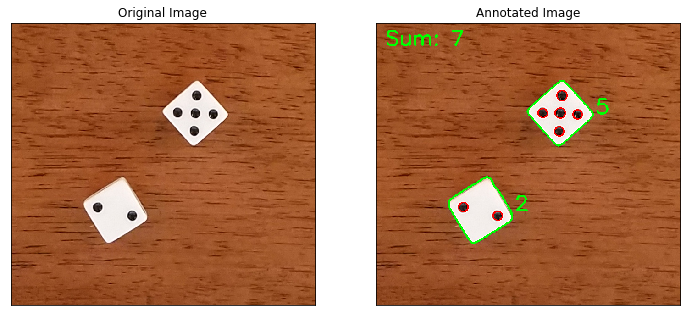

processing image:  ./input/dice2.png


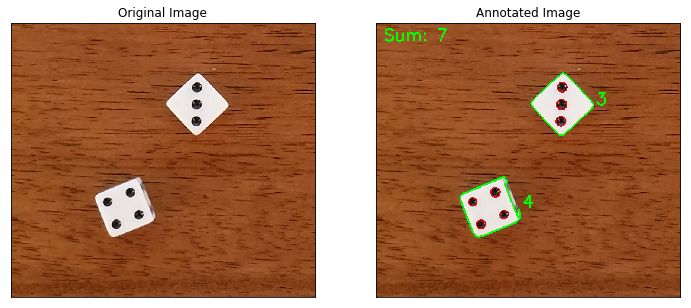

processing image:  ./input/dice3.png


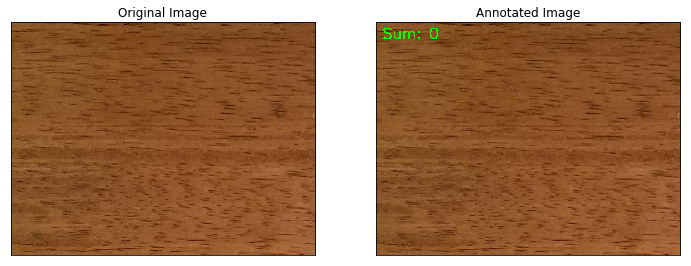

processing image:  ./input/dice4.png


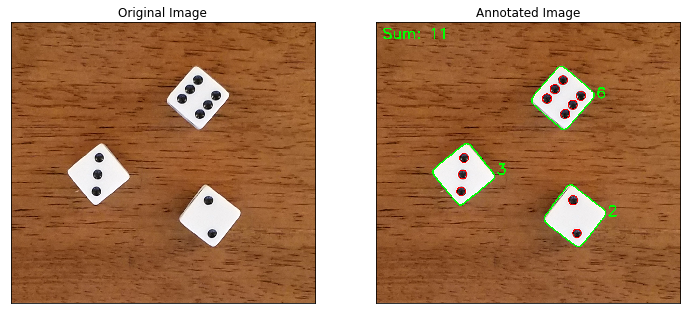

processing image:  ./input/dice5.png


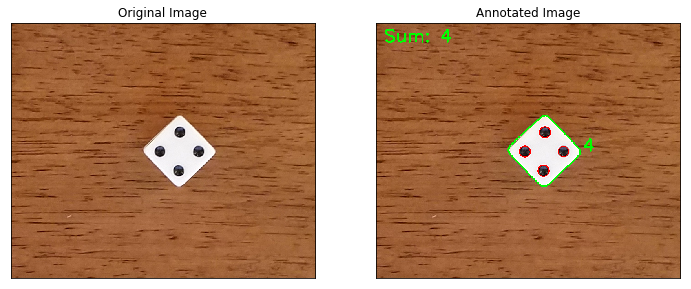

processing image:  ./input/dice6.png


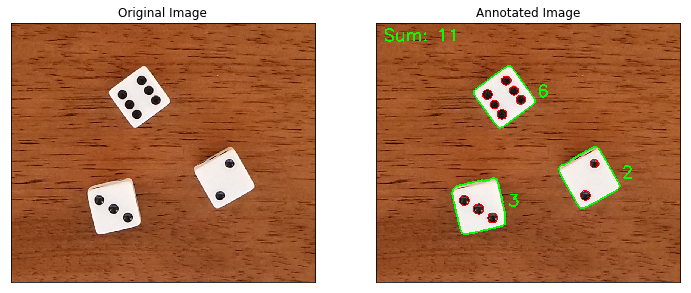

In [4]:
# find all image files
image_files = glob.glob('./input/*.png')


#
# loop through all the image files
#
for imgf in sorted(image_files):
    print("processing image: ",imgf)
    
    # get image file
    img = cv2.imread(imgf)
    displayImage(img,imgf)
    before_img = img.copy()
    
    # prepare image for processing: convert to gray,blur and reduce background noise
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    displayImage(gray,"gray " + imgf)
    blurred = cv2.blur(gray,(3,3))
    displayImage(blurred,"blurred "+ imgf)
    edges = cv2.Canny(blurred,100,500)
    displayImage(edges,"edges "+imgf)
    
    # isolate the objects by finding object contours
    die_contours,_ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # look for single die object in the contours list
    total_number_dots = 0
    for die_roi in die_contours:

        # get location and size of die region of interest
        (die_x,die_y,die_w, die_h) = cv2.boundingRect(die_roi)
        
        # based on edge detection and establishing contours around edges
        # die objects are assumed to have roi width > 100 pixels and height > 100 pixels
        if die_w > 100 and die_h > 100:
            # extract image for a die
            die_img = img[die_y:die_y+die_h,die_x:die_x+die_w]
            displayImage(die_img,"extracted die")

            # preprocess die image for object extraction
            die_gray = cv2.cvtColor(die_img, cv2.COLOR_BGR2GRAY)
            displayImage(die_gray,"extracted die")
            die_blurred = cv2.blur(die_gray,(2,2))
            displayImage(die_blurred,"blurred die")
            die_gray = cv2.Canny(die_blurred,100,700)
            
            # find region of interests for circls that are dots
            dots = cv2.HoughCircles(die_gray, cv2.HOUGH_GRADIENT, 1, 
                            20,  # minimum distance between cirlces
                           param1=200, param2=12,
                           minRadius=10, maxRadius=15)
            
            number_dots = 0
            # loop through all dot regions of interest found
            for dot_roi in dots[0]:
                number_dots += 1
                die_img = cv2.circle(die_img,(dot_roi[0],dot_roi[1]),dot_roi[2],(0,0,255),2)
                displayImage(die_img,"circles")
            
            
            # count number of dots
            total_number_dots += number_dots
            win_name = 'dots {:d}'.format(number_dots)
            displayImage(die_img,win_name)
            
            
            #display original image with die, dots and number of dots
            cv2.drawContours(img, [die_roi], 0, (0,255,0), 3)
            bbox = cv2.boundingRect(die_roi)
            img = cv2.putText(img,str(number_dots),
                              (bbox[0]+bbox[2]+5,bbox[1]+bbox[3]//2),
                             cv2.FONT_HERSHEY_SIMPLEX,1.5,(0,255,0),3,True)
            displayImage(img,"annotated die")
            
        
    # output total number of dots on image
    img = cv2.putText(img,"Sum: " + str(total_number_dots), (20,50),
                     cv2.FONT_HERSHEY_SIMPLEX,1.5, (0,255,0),3,False)
    displayImage(img,"Final Image")
    
    # display original and annotated images in the notebook
    fig, ax = plt.subplots(1,2,figsize=(12,10))
    
    ax[0].imshow(cv2.cvtColor(before_img,cv2.COLOR_BGR2RGB)) #convert from opencv BGR to matplotlib RGB
    ax[0].set(title="Original Image",xticks=[],yticks=[])
    
    ax[1].imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))  #convert from opencv BGR to matplotlib RGB
    ax[1].set(title='Annotated Image',xticks=[],yticks=[])

    plt.show()
    
    
    #
    #save annotated image to output file
    #
    #create output filename
    file_name_parts = imgf.split('/')
    output_name = './output/output_' + file_name_parts[2]
    
    #save image
    cv2.imwrite(output_name,img)
        